#### **@Author : Rupesh Kumar**

#### **Date : 13/12/2023**

<a id="1"></a>
<p style="background-color:#A100FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">Business Understanding - DataOpportunity Tracker - ABA</p


## <b><span style='color:#be6f37'>Background</span></b>

**Context:** ABA is a company specializing in data science and AI services. Its success hinges on accurately identifying and capitalizing on commercial opportunities that are relevant to its core expertise.

**Current Process:** ABA's sales pipeline includes numerous opportunities that need to be classified as either related or unrelated to data and AI. This classification is crucial for prioritizing resources and guiding strategic decisions.

**Observation:** The existing process for labeling these opportunities relies heavily on the subjective judgment of the sales team, leading to inconsistencies and inaccuracies.

##### <b><span style='color:#be6f37'>Challenge</span></b>


**Inaccurate Labeling:** The sales team at ABA has struggled with correctly categorizing opportunities as data/AI-related. This misclassification has led to underestimated business volumes and missed opportunities, impacting the company's strategic planning and revenue potential.

**Need for Precision:** Accurate classification is not just about volume estimation; it also affects resource allocation, market analysis, and the company's ability to respond effectively to market demands.

**Volume and Complexity:** The sheer volume of opportunities, coupled with their varying characteristics, makes manual classification challenging and prone to errors.


##### <b><span style='color:#be6f37'>Solution</span></b>

A machine learning model that can automatically classify commercial opportunities as data/AI-related or not, based on historical data.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#A100FF;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    

- [1. BUSINESS UNDERSTANDING](#1)

- [2. DATA UNDERSTANDING](#2)

    - [2.1 Get information on the data](#2.1)
    - [2.2 Conducting summary statistics](#2.2)
    - [2.3 Investigating all elements within each feature](#2.3)
    - [2.4 Creating time based features](#2.4)
    - [2.5 Extracting text based features](#2.5)
    - [2.6 Processing text based values](#2.6)
    

- [3. DATA VISUALIZATION](#3)
    - [3.1 Opportunities by client location and competition type](#3.1)
    - [3.2 Correlation Study](#3.2)
    - [3.3 Time Series Analysis for total current revenue over the years by quarter](#3.3)
    - [3.4 Scatter plot for win probability vs total current revenue](#3.4)
    - [3.5 Win Probability by client class](#3.5)
    - [3.6 Opportunity Size vs. Data/AI Label](#3.6)
    - [3.7 Segment Distribution](#3.7)

- [4. MODELING](#4)
    - [4.1 Exploring Semi-Supervised Learning with Label Spreading](#4.1)
    - [4.2 RandomForestClassifier](#4.2)
    - [4.3 Ensemble models with Synthetic Minority Over-sampling Technique (SMOTE)](#4.3)

- [5. DEPLOYMENT](#5)
- [6. CONCLUSION](#6)




In [1]:
# IMPORTING PACKAGES

# DATA PREPROCESSING
import numpy as np
import pandas as pd

# VISUALIZATION
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# MODELING 
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# LOADING DATA
df_opportunity = pd.read_csv("/Users/rupesh/Desktop/Res/Interviews/Accenture_Case/opportunities_pipeline.csv")

In [3]:
# CREATING A COPY OF DATAFRAME
df_opp = df_opportunity
df_opp

,opt_ID,opt_name_data,opt_desc_data,opt_name_size,opt_desc_size,client_class,id_client,segment,duration,opt_class,...,business_entity,client_location,competition_type,alliances,quarter,mergers,stage,win_prob,total_current_rev,aai_label
0,10777400,NaN,NaN,2,40,Très haute,0,B,Moins de 100,Très Importante,...,F,France,Competitive,non_data_all,FY20Q3,non_data_acq,3B,90,349988,0
1,11003779,NaN,NaN,4,37,Très haute,0,B,Moins de 100,Moyenne,...,E,France,Sole Sourced,non_data_all,FY21Q1,other,0A,30,9790,0
2,11049284,NaN,NaN,8,5,Très haute,0,B,Moins de 100,Faible,...,F,France,Sole Sourced,non_data_all,FY20Q3,other,3B,70,728,0
3,11067178,NaN,NaN,8,11,Très haute,0,B,Moins de 100,Faible,...,F,France,Sole Sourced,non_data_all,FY20Q1,other,3B,100,696,0
4,11046646,NaN,NaN,6,6,Très haute,0,B,Moins de 100,Faible,...,F,France,Sole Sourced,other,FY20Q2,other,3B,100,634,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,11029459,HANA,NaN,2,36,Basse,377,C,Moins de 100,Faible,...,F,Belgium,Competitive,non_data_all,FY20Q2,non_data_acq,1,30,976,1
3238,11019965,NaN,Workday Workday,6,26,Basse,382,C,Moins de 100,Faible,...,F,France,Sole Sourced,non_data_all,FY20Q1,other,3B,100,874,1
3239,10974836,NaN,NaN,4,18,Moyenne,387,C,Moins de 100,Faible,...,E,Belgium,Sole Sourced,other,FY20Q1,other,3B,10,694,1
3240,11113417,Data,data,2,5,Basse,388,C,Moins de 100,Faible,...,E,Netherlands,Sole Sourced,other,FY20Q3,other,1,50,652,1


<a id="2"></a>
<p style="background-color:#A100FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> Data Understanding</p>

#### **The dataset consists of 3242 Rows & 23 Columns which are as follows :**

- opt_ID - (A unique identifier for each commercial opportunity)
- opt_name_data - (data-related words found in the opportunity's title)
- opt_desc_data - (data-related words found in the opportunity's description)
- opt_name_size - (The total number of words in the opportunity's name)
- opt_desc_size - (The total number of words in the opportunity's description)
- id_client- (The identifier of the client)
- client_class - (Classification of the client based on their importance to the business)
- segment - (The department within the company where the opportunity is listed)
- duration - (Estimated duration of the mission in days)
- opt_class - (Classification of the opportunity based on its importance to the business)
- sales_capture - (Name of the salesperson who listed the opportunity)
- count_aai - (Total number of "AAI" opportunities identified by the salesperson)
- pricing_structure - (The agreed pricing structure with the client)
- business_entity - (The business entity or department within the company handling the opportunity)
- client_location - (Geographical location of the client)
- competition_type - (Indicates whether ABA is in competition to win the opportunity, (e.g., sole sourced, competitive))
- alliances - (Identifies if the opportunity involves a partnership with another data-related company)
- quarter - (The fiscal quarter in which the opportunity is recorded)
- mergers - (Identifies if the opportunity will be led by a subsidiary of the company related to data)
- stage - (Progression stage of the opportunity)
- win_prob - (The estimated probability of winning the opportunity)
- total_current_rev - (Expected revenue from the opportunity)
- aai_label - (Indicates if the opportunity has been labeled as 'data' by the salesperson)

<a id="2.1"></a>
## <b>2.1<span style='color:#be6f37'> Get information on the data</span></b>

In [4]:
df_opp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   opt_ID             3242 non-null   int64 
 1   opt_name_data      226 non-null    object
 2   opt_desc_data      343 non-null    object
 3   opt_name_size      3242 non-null   int64 
 4   opt_desc_size      3242 non-null   int64 
 5   client_class       3242 non-null   object
 6   id_client          3242 non-null   object
 7   segment            3242 non-null   object
 8   duration           3242 non-null   object
 9   opt_class          3242 non-null   object
 10  sales_capture      3242 non-null   object
 11  count_aai          3242 non-null   int64 
 12  pricing_struct     3242 non-null   object
 13  business_entity    3242 non-null   object
 14  client_location    3242 non-null   object
 15  competition_type   3242 non-null   object
 16  alliances          3242 non-null   object


In [5]:
# EXPLORING UNIQUE VALUES
df_opp["opt_name_data"].unique()

array([nan, 'Data', 'Analyse', 'Automat Factory', 'Analyti', 'Factory',
       'FACTORY', 'automat', 'Automat', 'Azure', 'Hana', 'PREDICT',
       'DATA', 'data', 'Workday', 'Roboti', 'HANA', 'factory', 'GCP',
       'Data Analyti', 'Data Data', 'Predict', 'AWS Azure',
       'Hana Analyti', 'Data Factory', 'Data factory', 'DATA analyti',
       'analyti', 'Artificial'], dtype=object)

In [6]:
# EXPLORING UNIQUE VALUES
df_opp["opt_desc_data"].unique()

array([nan, 'data', 'Analyti data', 'Automat factory', 'HANA HANA',
       'analyti', 'Factory', 'Data', 'Automat', 'Data Data',
       'automat factory automat', 'automat', 'analyse Data',
       'Data analyti', 'Analyti', 'Donné', 'analyti algorit',
       'Data donné', 'automat analyti', 'Data GCP', 'Data data',
       'Workday', 'azure', 'analyse', 'Hana', 'HANA', 'Azure', 'AWS',
       'AWS AWS AWS', 'data analyti', 'Automat analyti', 'analyse data',
       'donné', 'Azure Data', 'factory', 'Data Donné', 'Roboti',
       'algorit', 'Analyti Data', 'automat automat', 'DATA',
       'Data Data Data', 'Analyse', 'data Data', 'data data donné',
       'Data AWS', 'Azure AWS Analyti', 'GCP', 'predict', 'Data Analyti',
       'data Data data', 'data analyse', 'Data data Data', 'artificial',
       'predict analyti', 'data AWS data Azure data',
       'Data Analyti Data Analyti factory Hana', 'Data factory data',
       'data data', 'Data data data', 'data data data', 'Roboti automat',
 

In [7]:
# # EXPLORING UNIQUE VALUES
df_opp['quarter'].min()

'FY19Q4'

In [8]:
# # EXPLORING UNIQUE VALUES
df_opp['quarter'].max()

'FY22Q2'

<a id="2.2"></a>
## <b>2.2 <span style='color:#be6f37'> Conducting summary statistics</span></b>

In [9]:
# SUMMARY STATISTICS
df_opp.isnull().sum()

opt_ID                  0
opt_name_data        3016
opt_desc_data        2899
opt_name_size           0
opt_desc_size           0
client_class            0
id_client               0
segment                 0
duration                0
opt_class               0
sales_capture           0
count_aai               0
pricing_struct          0
business_entity         0
client_location         0
competition_type        0
alliances               0
quarter                 0
mergers                 0
stage                   0
win_prob                0
total_current_rev       0
aai_label               0
dtype: int64

#### <b><span style='color:#FF0000'> NOTE :</span></b>

**From the above summary statistics we could see that we have null value in “opt_name_data” & “opt_desc_data” have 93 % & 89 % of missing data respectively. The following are the steps we will do to further continue on the explanatory analysis in sequential order.**

<a id="2.3"></a>
## <b>2.3 <span style='color:#be6f37'> Investigating all elements within each feature</span></b>

In [10]:
for column in df_opp:
    unique_values = df_opp[column].unique()
    nr_values = len(unique_values)
    
    # If the column has fewer than 22 unique values, print them
    if nr_values < 22:
        print("The number of unique values for feature {}: {} --- {}".format(column, nr_values, unique_values))
    else:
        print("The number of unique values for feature {}: {}".format(column, nr_values))


The number of unique values for feature opt_ID: 3242
The number of unique values for feature opt_name_data: 29
The number of unique values for feature opt_desc_data: 75
The number of unique values for feature opt_name_size: 9 --- [2 4 8 6 5 3 7 1 9]
The number of unique values for feature opt_desc_size: 52
The number of unique values for feature client_class: 5 --- ['Très haute' 'Moyenne' 'Basse' 'Haute' 'Inconnue']
The number of unique values for feature id_client: 396
The number of unique values for feature segment: 5 --- ['B' 'C' 'A' 'E' 'D']
The number of unique values for feature duration: 2 --- ['Moins de 100' 'Entre 100 et 200']
The number of unique values for feature opt_class: 4 --- ['Très Importante' 'Moyenne' 'Faible' 'Importante']
The number of unique values for feature sales_capture: 582
The number of unique values for feature count_aai: 18 --- [ 5 59  1  0  9  2  6 10  4 11  3  8  7 12 14 21 16 15]
The number of unique values for feature pricing_struct: 3 --- ['type B' 't

<a id="2.4"></a>
## <b>2.4 <span style='color:#be6f37'> Processing & creating new feature</span></b>

In [11]:
# Duration replace string to int. < 100 -> 0 and > 100 = 1
dict_duration = {val:i for i, val in enumerate(df_opp.duration.unique())}
df_opp['duration'] = df_opp['duration'].replace(dict_duration)

# Extracting year and quarter
df_opp['year'] = 2000 + df_opp['quarter'].str[2:4].astype(int)  # Extracting the year part
df_opp['quarter_number'] = df_opp['quarter'].str[-1]  # Extracting the quarter number

# Clien class : Tres haute = 3, Haute = 2, Moyenne = 1, Basse = 0, Inconnue = NA
dict_class = {'Très haute':3, 'Moyenne':1, 'Basse':0, 'Haute':2, 'Inconnue':np.nan}
df_opp['client_class'] = df_opp['client_class'].replace(dict_class)

# Opt class : Tres haute = 3, Haute = 2, Moyenne = 1, Basse = 0, Inconnue = NA
dict_class = {'Très Importante':3, 'Moyenne':1, 'Faible':0, 'Importante':2}
df_opp['opt_class'] = df_opp['opt_class'].replace(dict_class)
 
 # Replace competition type : 'Competitive':1, 'Sole Sourced':0, '-':np.nan
dict_ct = {'Competitive':1, 'Sole Sourced':0, '-':np.nan}
df_opp['competition_type'] = df_opp['competition_type'].map(dict_ct)


# Handling missing values for 'client_class' and 'competition_type' by converting the missing values to Unknown strings.
df_opp['client_class'].fillna('Unknown', inplace=True)
df_opp['competition_type'].fillna('Unknown', inplace=True)

# For 'alliances' and 'mergers', since they contain categories that involves data or not,
# We can encode these as numerical values reflecting the type of alliance/merger.
# For example:
# 'non_data_all' and 'non_data_acq' could be encoded as 0 (not data-related),
# 'data_all' and 'data_acq' as 1 (data-related),
# 'other' as 2 (neutral or other types of alliances/mergers).

alliance_merger_encoding = {
    'non_data_all': 0, 'other': 2, 'data_all': 1,
    'non_data_acq': 0, 'data_acq': 1
}

df_opp['alliances'] = df_opp['alliances'].map(alliance_merger_encoding)
df_opp['mergers'] = df_opp['mergers'].map(alliance_merger_encoding)

# Now for the 'stage' column, we can encode this based on the advancement of the opportunity.
# We know that '0A' as the earliest stage and '3B' as the most advanced.
# A simple way could be to use a custom encoding that reflects the order:
stage_encoding = {'0A': 0, '1': 1, '2A': 2, '2B': 3, '3A': 4, '3B': 5}
df_opp['stage'] = df_opp['stage'].map(stage_encoding)

# Let's check the transformations
df_opp[['client_class', 'competition_type', 'alliances', 'mergers', 'stage']].head()
df_opp



,opt_ID,opt_name_data,opt_desc_data,opt_name_size,opt_desc_size,client_class,id_client,segment,duration,opt_class,...,competition_type,alliances,quarter,mergers,stage,win_prob,total_current_rev,aai_label,year,quarter_number
0,10777400,NaN,NaN,2,40,3.0,0,B,0,3,...,1.0,0,FY20Q3,0,5,90,349988,0,2020,3
1,11003779,NaN,NaN,4,37,3.0,0,B,0,1,...,0.0,0,FY21Q1,2,0,30,9790,0,2021,1
2,11049284,NaN,NaN,8,5,3.0,0,B,0,0,...,0.0,0,FY20Q3,2,5,70,728,0,2020,3
3,11067178,NaN,NaN,8,11,3.0,0,B,0,0,...,0.0,0,FY20Q1,2,5,100,696,0,2020,1
4,11046646,NaN,NaN,6,6,3.0,0,B,0,0,...,0.0,2,FY20Q2,2,5,100,634,0,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,11029459,HANA,NaN,2,36,0.0,377,C,0,0,...,1.0,0,FY20Q2,0,1,30,976,1,2020,2
3238,11019965,NaN,Workday Workday,6,26,0.0,382,C,0,0,...,0.0,0,FY20Q1,2,5,100,874,1,2020,1
3239,10974836,NaN,NaN,4,18,1.0,387,C,0,0,...,0.0,2,FY20Q1,2,5,10,694,1,2020,1
3240,11113417,Data,data,2,5,0.0,388,C,0,0,...,0.0,2,FY20Q3,2,1,50,652,1,2020,3


<a id="2.5"></a>
## <b>2.5 <span style='color:#be6f37'> Extracting text based values</span></b>

#### <b><span style='color:#FF0000'> NOTE :</span></b>

- ##### Given the unreliability of the 'aai_label' in accurately tagging data-related opportunities, we will establish a more trustworthy labeling method. Our approach, named is_data_related_combined, will be crafted by extracting and analyzing textual information from the fields 'opt_name_data' and 'opt_desc_data'. 

- ##### This method aims to identify data-related opportunities more accurately by focusing on specific, text-based indicators within these fields, ensuring a higher level of trustworthiness in our labeling process.

In [12]:
# Get unique values from the "opt_name_data" column
unique_opt_name_data = df_opp["opt_name_data"].unique()

# Get unique values from the "opt_desc_data" column
unique_opt_desc_data = df_opp["opt_desc_data"].unique()

# Combine the unique values from both columns using pandas Series
combined_series = pd.Series(np.concatenate([unique_opt_name_data, unique_opt_desc_data]))

# Extract unique values from the combined Series
unique_combined_values = combined_series.unique()

# Unique_combined_values contains the unique values from both columns
unique_combined_values

array([nan, 'Data', 'Analyse', 'Automat Factory', 'Analyti', 'Factory',
       'FACTORY', 'automat', 'Automat', 'Azure', 'Hana', 'PREDICT',
       'DATA', 'data', 'Workday', 'Roboti', 'HANA', 'factory', 'GCP',
       'Data Analyti', 'Data Data', 'Predict', 'AWS Azure',
       'Hana Analyti', 'Data Factory', 'Data factory', 'DATA analyti',
       'analyti', 'Artificial', 'Analyti data', 'Automat factory',
       'HANA HANA', 'automat factory automat', 'analyse Data',
       'Data analyti', 'Donné', 'analyti algorit', 'Data donné',
       'automat analyti', 'Data GCP', 'Data data', 'azure', 'analyse',
       'AWS', 'AWS AWS AWS', 'data analyti', 'Automat analyti',
       'analyse data', 'donné', 'Azure Data', 'Data Donné', 'algorit',
       'Analyti Data', 'automat automat', 'Data Data Data', 'data Data',
       'data data donné', 'Data AWS', 'Azure AWS Analyti', 'predict',
       'data Data data', 'data analyse', 'Data data Data', 'artificial',
       'predict analyti', 'data AWS data A

In [13]:
# EXTRACTED KEYWORDS
keywords = [ 'data', 'analyse', 'automat factory', 'analyti', 'factory',
       'automat', 'azure', 'hana', 'predict', 'workday', 'roboti', 'gcp',
       'data analyti', 'data data', 'aws azure', 'hana analyti',
       'data factory', 'artificial', 'analyti data', 'hana hana',
       'automat factory automat', 'analyse data', 'donné',
       'analyti algorit', 'data donné', 'automat analyti', 'data gcp',
       'aws', 'aws aws aws', 'azure data', 'algorit', 'automat automat',
       'data data data', 'data data donné', 'data aws',
       'azure aws analyti', 'data analyse', 'predict analyti',
       'data aws data azure data',
       'data analyti data analyti factory hana', 'data factory data',
       'roboti automat', 'analyti data analyti', 'artificial automat',
       'azure azure', 'data azure', 'hana azure hana azure', 'hana azure',
       'predict automat', 'data data data data', 'data data analyti',
       'data analyti analyti data', 'predict data', 'workday workday']

# Function to check if any keyword is in the text
def is_data_related(text):
    return any(keyword in text for keyword in keywords)

# Apply the function to create a binary feature
df_opp['is_data_related'] = df_opp[['opt_name_data', 'opt_desc_data']].fillna('').agg(' '.join, axis=1).apply(is_data_related).astype(int)

# Check the first few rows of the updated dataframe
df_opp[['opt_name_data', 'opt_desc_data', 'is_data_related']].head()


,opt_name_data,opt_desc_data,is_data_related
0,NaN,NaN,0
1,NaN,NaN,0
2,NaN,NaN,0
3,NaN,NaN,0
4,NaN,NaN,0


<a id="2.6"></a>
## <b>2.6 <span style='color:#be6f37'> Enriching text based values</span></b>

- #### The logic developed combines the 'alliances', 'mergers', and 'is_data_related' features into a single 'is_data_related_combined' label in the dataset. This combined label is set to 1 (indicating data-related) if either 'alliances' or 'mergers' is 1, suggesting a partnership or subsidiary involvement in data-related activities. 

- #### If both 'alliances' and 'mergers' are 0 and 'is_data_related' is also 0, it's set to 0 (non-data-related). In all other cases, it retains the value of 'is_data_related'. This approach ensures a more comprehensive identification of data-related opportunities by considering various aspects of business partnerships and mergers.

In [14]:
# Logic to combine 'alliances', 'mergers', and 'is_data_related' into a unified 'is_data_related' label
df_opp['is_data_related_combined'] = df_opp.apply(
    lambda row: 1 if row['alliances'] == 1 or row['mergers'] == 1 else 
               (0 if row['alliances'] == 0 and row['mergers'] == 0 and row['is_data_related'] == 0 else row['is_data_related']), 
    axis=1
)


![Target Feature](images/Target_feature.png)


In [15]:
df_opp['is_data_related'].value_counts()

0    3055
1     187
Name: is_data_related, dtype: int64

In [16]:
df_opp['is_data_related_combined'].value_counts()

0    2635
1     607
Name: is_data_related_combined, dtype: int64

#### <b><span style='color:#FF0000'> NOTE :</span></b>
##### From the above we can see that we have improved our target feature which we will be able to use build our model. 


In [17]:
df_opp


,opt_ID,opt_name_data,opt_desc_data,opt_name_size,opt_desc_size,client_class,id_client,segment,duration,opt_class,...,quarter,mergers,stage,win_prob,total_current_rev,aai_label,year,quarter_number,is_data_related,is_data_related_combined
0,10777400,NaN,NaN,2,40,3.0,0,B,0,3,...,FY20Q3,0,5,90,349988,0,2020,3,0,0
1,11003779,NaN,NaN,4,37,3.0,0,B,0,1,...,FY21Q1,2,0,30,9790,0,2021,1,0,0
2,11049284,NaN,NaN,8,5,3.0,0,B,0,0,...,FY20Q3,2,5,70,728,0,2020,3,0,0
3,11067178,NaN,NaN,8,11,3.0,0,B,0,0,...,FY20Q1,2,5,100,696,0,2020,1,0,0
4,11046646,NaN,NaN,6,6,3.0,0,B,0,0,...,FY20Q2,2,5,100,634,0,2020,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,11029459,HANA,NaN,2,36,0.0,377,C,0,0,...,FY20Q2,0,1,30,976,1,2020,2,0,0
3238,11019965,NaN,Workday Workday,6,26,0.0,382,C,0,0,...,FY20Q1,2,5,100,874,1,2020,1,0,0
3239,10974836,NaN,NaN,4,18,1.0,387,C,0,0,...,FY20Q1,2,5,10,694,1,2020,1,0,0
3240,11113417,Data,data,2,5,0.0,388,C,0,0,...,FY20Q3,2,1,50,652,1,2020,3,1,1


In [18]:
# DROPPING UNINTERESTING VALUES
df_opp.drop(["opt_name_data","opt_desc_data","alliances","mergers","is_data_related","quarter"], axis=1, inplace=True)

In [19]:
df_opp

,opt_ID,opt_name_size,opt_desc_size,client_class,id_client,segment,duration,opt_class,sales_capture,count_aai,...,business_entity,client_location,competition_type,stage,win_prob,total_current_rev,aai_label,year,quarter_number,is_data_related_combined
0,10777400,2,40,3.0,0,B,0,3,michelle.g,5,...,F,France,1.0,5,90,349988,0,2020,3,0
1,11003779,4,37,3.0,0,B,0,1,michelle.g,5,...,E,France,0.0,0,30,9790,0,2021,1,0
2,11049284,8,5,3.0,0,B,0,0,michelle.g,5,...,F,France,0.0,5,70,728,0,2020,3,0
3,11067178,8,11,3.0,0,B,0,0,michelle.g,5,...,F,France,0.0,5,100,696,0,2020,1,0
4,11046646,6,6,3.0,0,B,0,0,michelle.g,5,...,F,France,0.0,5,100,634,0,2020,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,11029459,2,36,0.0,377,C,0,0,guy.f,1,...,F,Belgium,1.0,1,30,976,1,2020,2,0
3238,11019965,6,26,0.0,382,C,0,0,marianne.g,1,...,F,France,0.0,5,100,874,1,2020,1,0
3239,10974836,4,18,1.0,387,C,0,0,david.r,1,...,E,Belgium,0.0,5,10,694,1,2020,1,0
3240,11113417,2,5,0.0,388,C,0,0,maryse.r,1,...,E,Netherlands,0.0,1,50,652,1,2020,3,1


<a id="1"></a>
<p style="background-color:#A100FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">DATA VISUALIZATION</p

<a id="3.1"></a>
## <b>3.1 <span style='color:#be6f37'>Opportunities by client location and competition type</span></b>

In [20]:
count_df = df_opp.groupby(['client_location', 'competition_type']).size().reset_index(name='count')

# Create an interactive bar plot using Plotly
fig = px.bar(count_df, x='client_location', y='count', color='competition_type',
             labels={'client_location': 'Client Location', 'count': 'Count'},
             hover_name="competition_type", color_discrete_sequence=[
                 px.colors.qualitative.Alphabet[7],
                 px.colors.qualitative.Alphabet[11],
               px.colors.qualitative.Plotly[2]],
             title='Count of Opportunities by Client Location and Competition Type')

# Show the plot
fig.show()


![Target Feature](https://github.com/Rupesh707/DataOpportunity_Tracker/blob/Master/Images/compt.png)


#### <b><span style='color:#FF0000'> NOTE :</span></b>

#### We can observe that most of our Client are located in France followe by Netherlads & Belguim.

#### Potential Actions: The high volume of 'Unknown' competition types could be a point of concern, indicating the need for better data collection or classification processes.

<a id="3.2"></a>
## <b>3.2 <span style='color:#be6f37'> Correlation Study</span></b>

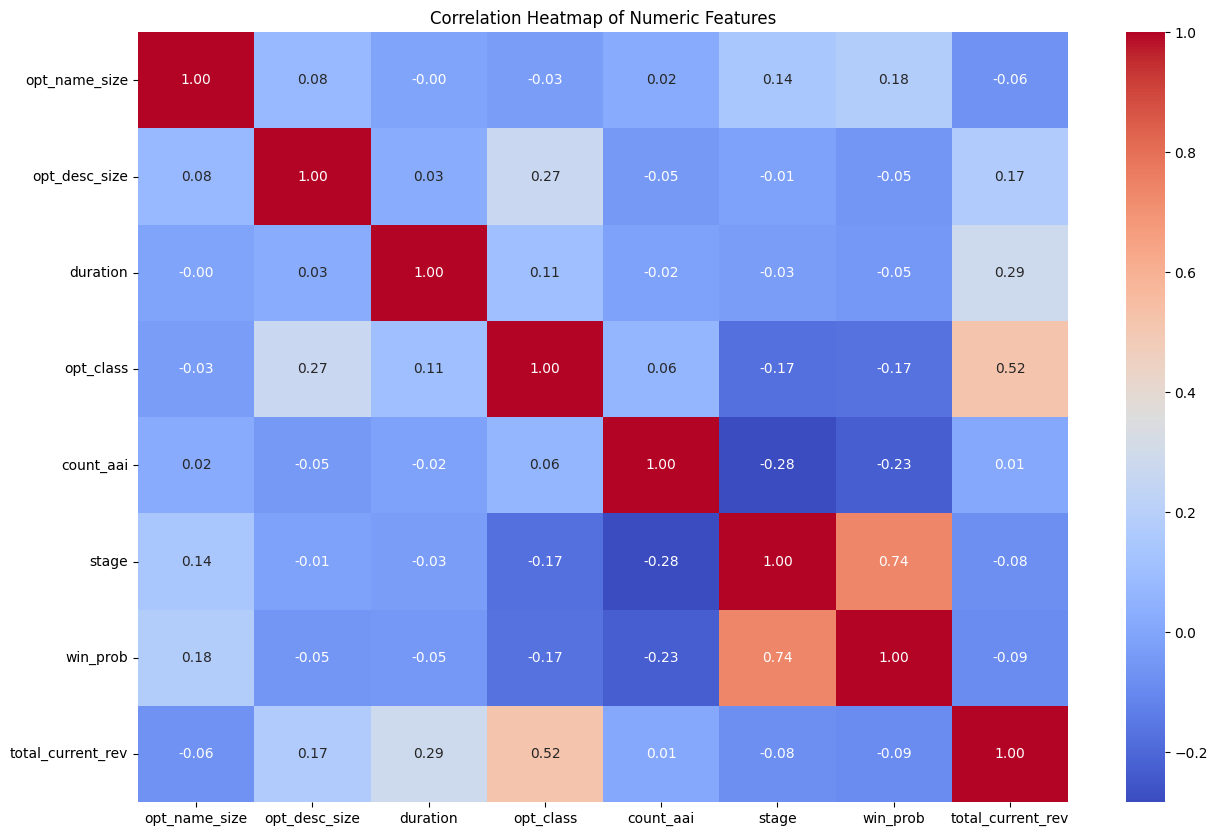

In [21]:
# Extract the numeric features from your combined_data DataFrame
numeric_features = [
    'opt_name_size', 'opt_desc_size', 'duration',
    'opt_class', 'count_aai', 'stage',
    'win_prob', 'total_current_rev'
]


# Calculate the correlation matrix
correlation_matrix = df_opp[numeric_features].corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


<a id="3.3"></a>
## <b>3.3<span style='color:#be6f37'> Time Series Analysis for total current revenue over the years by quarter</span></b>

In [22]:
# Time Series Analysis for total current revenue over the years by quarter
df_opp['date'] = pd.to_datetime(df_opp['year'].astype(str) + 'Q' + df_opp['quarter_number'].astype(str))
time_series = df_opp.groupby('date')['total_current_rev'].sum().reset_index()

fig_time_series = px.line(time_series, x='date', y='total_current_rev', title='Total Current Revenue Over Time')
fig_time_series.show()


![Target Feature](images/time.png)


#### <b><span style='color:#FF0000'> NOTE :</span></b>

#### Peak and Decline: There is a noticeable peak in revenue around July 2020, suggesting a successful period or a large number of closed deals. After this peak, there is a sharp decline, indicating a period of reduced revenue which could be due to seasonal factors, market changes, or other external events.

#### Recovery Trend: Starting from October 2020, there appears to be a gradual recovery, with revenue increasing again until it starts to plateau. This could imply the implementation of successful strategies or an adapting market, although it hasn't returned to the peak levels seen in mid-2020.

<a id="3.4"></a>
## <b>3.4<span style='color:#be6f37'> Scatter plot for win probability vs total current revenue</span></b>

In [23]:
# Win probability vs total current revenue
fig_pairwise = px.scatter(df_opp, x='win_prob', y='total_current_rev', color='segment', title='Win Probability vs Total Current Revenue')
fig_pairwise.show()


![Target Feature](images/win.png)


#### <b><span style='color:#FF0000'> NOTE :</span></b>

#### Revenue Distribution Across Win Probabilities: Higher total current revenues are not necessarily associated with higher win probabilities. There are opportunities with high revenue across a wide range of win probabilities, including those with lower chances of winning.

#### Segment Representation: There is a variety of 'segments' represented across different win probabilities, but it appears that certain segments, like 'D' and 'E', are more frequently associated with the higher revenue opportunities. This could indicate that these segments are more lucrative or that they involve higher-stakes deals.

<a id="3.5"></a>
## <b>3.5<span style='color:#be6f37'> Win Probability by client class</span></b>

In [24]:
# Filtering out 'Unknown' client class
filtered_df = df_opp[df_opp['client_class'] != 'Unknown']

# Creating the boxplot with Plotly
fig = px.box(filtered_df, x='client_class', y='win_prob',
             color='client_class',  # Color by client class
             labels={'win_prob': 'Win Probability', 'client_class': 'Client Class'},
             title='Win Probability by Client Class')

fig.show()

![Target Feature](images/box.png)


#### <b><span style='color:#FF0000'> NOTE :</span></b>
#### This boxplot shows the distribution of win probabilities across different client classes.
#### It can indicate whether certain client classes are typically seen as having higher or lower chances of winning an opportunity. 
#### Such insights can be useful for prioritizing efforts on specific client segments.

<a id="3.6"></a>
## <b>3.6<span style='color:#be6f37'> Opportunity Size vs. Data/AI Label</span></b>

In [25]:
# Visualization 2: Opportunity Size vs. Data/AI Label
# Using 'opt_name_size' as a representation of opportunity size
fig = px.box(df_opp, x='aai_label', y='opt_name_size', 
             labels={'opt_name_size': 'Opportunity Size', 'aai_label': 'Data/AI Label'},
             title='Opportunity Size by Data/AI Label',
             color='aai_label',  # Color by Data/AI Label
             color_discrete_sequence=px.colors.qualitative.Set2)

fig.show()

![Target Feature](images/dat.png)


#### <b><span style='color:#FF0000'> NOTE :</span></b>
##### This boxplot compares the sizes of opportunities (as indicated by 'opt_name_size') between those that are data/AI-related and those that are not. It can reveal whether data/AI-related opportunities tend to be larger or smaller in size compared to others. This information might be useful for understanding the nature of data/AI opportunities and how they differ in scale from other types of opportunities.


<a id="3.7"></a>
## <b>3.7<span style='color:#be6f37'>Segment Distribution</span></b>

In [26]:
# Visualization 4: Segment Distribution
# Defining the order of segments
segment_order = ['A', 'B', 'C', 'D', 'E']

# Creating the bar chart with Plotly
fig = px.histogram(df_opp, x='segment', color='aai_label',
                   category_orders={'segment': segment_order},  # Ensuring segments are in the specified order
                   barmode='group',
                   labels={'segment': 'Market Segment', 'aai_label': 'Data/AI Label'},
                   title='Opportunity Distribution Across Market Segments',
                   color_discrete_sequence=px.colors.qualitative.Set2)

fig.show()

![Target Feature](images/opp.png)


#### <b><span style='color:#FF0000'> NOTE :</span></b>
#### This countplot displays the distribution of opportunities across different market segments,broken down by whether they are data/AI-related or not. It can provide insights into which segments are more likely to have data/AI-related opportunities and may help in strategic market targeting decisions.


<a id="2"></a>
<p style="background-color:#A100FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> Modeling</p>

#### In this section we will be testing on ensemble of models to find the best fit as we are aware that some data-related opportunities might not have been tagged correctly. Therefore, part of the study was to identify  mislabeled opportunities using the available data, implying that the "aai_label" cannot be fully trusted as it might contain inaccuracies. This was ther reason we have create during the data understanding to help in accurately labeling data-related opportunities.


In [27]:
# PREPARING FOR MODELING
df_opp.drop(["date","aai_label"], axis=1, inplace=True)

In [28]:
df_opp

,opt_ID,opt_name_size,opt_desc_size,client_class,id_client,segment,duration,opt_class,sales_capture,count_aai,pricing_struct,business_entity,client_location,competition_type,stage,win_prob,total_current_rev,year,quarter_number,is_data_related_combined
0,10777400,2,40,3.0,0,B,0,3,michelle.g,5,type B,F,France,1.0,5,90,349988,2020,3,0
1,11003779,4,37,3.0,0,B,0,1,michelle.g,5,type A,E,France,0.0,0,30,9790,2021,1,0
2,11049284,8,5,3.0,0,B,0,0,michelle.g,5,type B,F,France,0.0,5,70,728,2020,3,0
3,11067178,8,11,3.0,0,B,0,0,michelle.g,5,type B,F,France,0.0,5,100,696,2020,1,0
4,11046646,6,6,3.0,0,B,0,0,michelle.g,5,type A,F,France,0.0,5,100,634,2020,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,11029459,2,36,0.0,377,C,0,0,guy.f,1,type A,F,Belgium,1.0,1,30,976,2020,2,0
3238,11019965,6,26,0.0,382,C,0,0,marianne.g,1,type A,F,France,0.0,5,100,874,2020,1,0
3239,10974836,4,18,1.0,387,C,0,0,david.r,1,type B,E,Belgium,0.0,5,10,694,2020,1,0
3240,11113417,2,5,0.0,388,C,0,0,maryse.r,1,type B,E,Netherlands,0.0,1,50,652,2020,3,1


<a id="4.1"></a>
## <b>4.1 <span style='color:#be6f37'>Exploring Semi-Supervised Learning with Label Spreading</span></b>

##### In our semi-supervised learning approach, we are employing the Label Spreading model to address the challenge of mixed labeled and unlabeled data. This approach is particularly effective in our context:

- Class 0 (Not Data-Related)
- Class 1 ( Data-Related)

##### Label Spreading leverages the similarities between samples, allowing us to propagate labels from the limited labeled data to the larger pool of unlabeled data. This is crucial for our dataset, where the accuracy of manual labeling (like salespeople's tags) is questionable. By applying this model, we aim to enhance the identification of data-related opportunities, especially in cases where opportunities might have been mislabeled or left unlabeled. This method is expected to yield more reliable results in our scenario.

In [29]:
# Convert numeric values to strings
df_opp['client_class'] = df_opp['client_class'].astype(str)
df_opp['id_client'] = df_opp['id_client'].astype(str)
df_opp['competition_type'] = df_opp['competition_type'].astype(str)
df_opp['sales_capture'] = df_opp['sales_capture'].astype(str)
df_opp['pricing_struct'] = df_opp['pricing_struct'].astype(str)
df_opp['client_location'] = df_opp['client_location'].astype(str)
df_opp["segment"]= df_opp["segment"].astype(str)
df_opp['year'] = df_opp['year'].astype(str)
df_opp['quarter_number'] = df_opp['quarter_number'].astype(str)


In [30]:
df_opp["business_entity"].unique()

array(['F', 'E', 'C', 'D', 'B', 'A'], dtype=object)

In [31]:
# Seperating numeric feature,categorical features and target
numeric_features = [
    'opt_name_size','opt_desc_size','duration', 
    'opt_class','count_aai','stage',
    'win_prob','total_current_rev'

]

categorical_features = ['client_class','id_client', 'competition_type','segment','business_entity',
                        'sales_capture','pricing_struct','client_location','year','quarter_number']

target = ["is_data_related_combined"]

In [32]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import classification_report

# LABEL SPREADING
# Define numeric and categorical features
numeric_features = ['opt_name_size', 'opt_desc_size', 'duration', 
                    'opt_class', 'count_aai', 'stage',
                    'win_prob', 'total_current_rev']

categorical_features = ['client_class','id_client', 'competition_type','segment','business_entity',
                        'sales_capture','pricing_struct','client_location','year','quarter_number']


# Convert numeric columns to numeric type and fill missing values
for col in numeric_features:
    df_opp[col] = pd.to_numeric(df_opp[col], errors='coerce')
df_opp[numeric_features] = df_opp[numeric_features].fillna(df_opp[numeric_features].mean())

# Encode categorical features and handle missing values
df_opp[categorical_features] = df_opp[categorical_features].fillna('Unknown')
X_categorical_encoded = pd.get_dummies(df_opp[categorical_features])

# Combine numeric and encoded categorical features
X_combined = pd.concat([df_opp[numeric_features], X_categorical_encoded], axis=1)

# Split data into training and testing sets
y = df_opp[target].fillna(-1)  # Fill NaN in target variable for semi-supervised learning
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

# Convert y_train and y_test to 1D array using values attribute and ravel method
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

# Initialize and fit the Label Spreading model
label_spread = LabelSpreading(kernel='knn', alpha=0.8, max_iter=100)  # Increased max_iter
label_spread.fit(X_train, y_train_1d)  # Use the 1D array for y_train

# Predict and evaluate the model
y_pred = label_spread.predict(X_test)
report = classification_report(y_test_1d, y_pred, labels=np.unique(y_pred))  # Use the 1D array for y_test
print(report)


              precision    recall  f1-score   support

           0       0.83      0.98      0.90       533
           1       0.35      0.05      0.09       116

    accuracy                           0.81       649
   macro avg       0.59      0.52      0.49       649
weighted avg       0.74      0.81      0.75       649



#### <b><span style='color:#FF0000'> NOTE :</span></b>

#### Initial Evaluation of the Model

The preliminary assessment of our model indicates promising performance. However, a closer examination reveals a notable class imbalance, which may skew the results and affect the reliability of the model. Specifically, the distribution of classes is as follows:

- Class 0 (Not Data-Related): 2,635 instances
- Class 1 (Data-Related): 607 instances

#### Addressing Class Imbalance Concerns

Given this substantial disparity between Class 0 and Class 1, it's crucial to acknowledge that our current results might not fully capture the model's efficacy. The predominance of Class 0 could lead to a bias towards this category, potentially undermining the model's ability to accurately identify and classify instances of Class 1. Therefore, further steps are necessary to ensure a more balanced and representative model performance.

<a id="4.2"></a>
## <b>4.2 <span style='color:#be6f37'>RandomForestClassifier</span></b>

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


# Assuming the following columns are in your DataFrame
numeric_features = [
    'opt_name_size', 'opt_desc_size', 'duration', 
    'opt_class', 'count_aai', 'business_entity', 'stage',
    'win_prob', 'total_current_rev'
]
categorical_features = [
    'client_class', 'id_client', 'competition_type',
    'sales_capture', 'pricing_struct', 'client_location', 'year', 'quarter_number'
]
target = 'is_data_related_combined'

# Preprocessing: Standardization of numeric features and encoding of categorical features
df_opp[numeric_features] = df_opp[numeric_features].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)
df_opp[categorical_features] = df_opp[categorical_features].fillna('Unknown')
X_categorical_encoded = pd.get_dummies(df_opp[categorical_features])
X_combined = pd.concat([df_opp[numeric_features], X_categorical_encoded], axis=1)

# Split data into labeled and unlabeled sets
# For demonstration, let's assume a part of your data is unlabeled (-1 for missing labels)
y = df_opp[target].copy()
unlabeled_mask = np.random.rand(len(y)) < 0.5  # Randomly choosing 50% data as unlabeled
y[unlabeled_mask] = -1

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Initialize a base classifier
base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Wrap the base classifier with SelfTrainingClassifier
# Use threshold instead of k
self_training_model = SelfTrainingClassifier(base_classifier, criterion='threshold', threshold=0.85)

# Train the model (Note: y_train contains -1 for unlabeled instances)
self_training_model.fit(X_train, y_train)

# Evaluate the model
y_pred = self_training_model.predict(X_test)
y_test_true = y_test[y_test != -1]  # Filter out the true labels for evaluation
y_pred_true = y_pred[y_test != -1]
report = classification_report(y_test_true, y_pred_true)
print(report)


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       264
           1       0.80      0.15      0.26        52

    accuracy                           0.85       316
   macro avg       0.83      0.57      0.59       316
weighted avg       0.85      0.85      0.81       316



<a id="4.3"></a>
## <b>4.3 <span style='color:#be6f37'>Ensemble models with Synthetic Minority Over-sampling Technique (SMOTE)</span></b>

In [34]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Assuming df_opp is your DataFrame and the following columns are defined
numeric_features = [
    'opt_name_size', 'opt_desc_size', 'duration', 
    'opt_class', 'count_aai', 'business_entity', 'stage',
    'win_prob', 'total_current_rev'
]
categorical_features = [
    'client_class', 'id_client', 'competition_type',
    'sales_capture', 'pricing_struct', 'client_location', 'year', 'quarter_number'
]
target = 'is_data_related_combined'

# Preprocessing: Standardization of numeric features and encoding of categorical features
df_opp[numeric_features] = df_opp[numeric_features].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)
df_opp[categorical_features] = df_opp[categorical_features].fillna('Unknown')
X_categorical_encoded = pd.get_dummies(df_opp[categorical_features])
X_combined = pd.concat([df_opp[numeric_features], X_categorical_encoded], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Split data into training and testing sets
y = df_opp[target]
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Apply SMOTE for the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define base models for stacking
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Define the stacking ensemble
stack_model = StackingClassifier(
    estimators=base_models, 
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True,
    cv=5
)

# Train the stacking ensemble
stack_model.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate the ensemble
y_pred = stack_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)



              precision    recall  f1-score   support

           0       0.87      0.95      0.91       533
           1       0.61      0.32      0.42       116

    accuracy                           0.84       649
   macro avg       0.74      0.64      0.66       649
weighted avg       0.82      0.84      0.82       649



In [35]:
# METRICS 
data = {
    'Model': ['Label Spreading','RandomForestClassifier','Ensemble models with SMOTE',],
    'Accuracy': [0.81, 0.85, 0.84],  
    'Precision': [0.83, 0.86, 0.87], 
    'Recall': [0.93, 0.99, 0.95],    
    'F1-Score': [0.90, 0.92, 0.91] 
}

# Creating the DataFrame
model_comparison = pd.DataFrame(data)

# Display the DataFrame
model_comparison


,Model,Accuracy,Precision,Recall,F1-Score
0,Label Spreading,0.81,0.83,0.93,0.90
1,RandomForestClassifier,0.85,0.86,0.99,0.92
2,Ensemble models with SMOTE,0.84,0.87,0.95,0.91


#### <b><span style='color:#FF0000'> NOTE :</span></b>

#### In summary, while all three models perform well, the RandomForestClassifier stands out in terms of accuracy and recall, making it highly effective for our objective with a similar structure and characteristics. However, the Ensemble model with SMOTE shows the best precision, making it a strong contender, especially in imbalanced datasets. 

- The choice between these models would depend on the specific requirements of our application, such as the importance of balancing false positives (precision) vs. false negatives (recall).

<a id="5"></a>
<p style="background-color:#A100FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> DEPLOYMENT STRATEGY & BUSINESS VALUE </p>

*1. Model Validation and Testing*

- Perform thorough validation to ensure the model performs well on unseen data, is robust, and generalizes well.
- Engage with domain experts to review the model's predictions and incorporate their feedback.

*2. Cost-Benefit Analysis*
-	Conduct a cost-benefit analysis to determine the economic impact of deploying the model.
-	Consider factors like implementation costs, potential savings, revenue growth, and risk mitigation.

*3. Deployment Strategy*
-	Determine the deployment environment (cloud, on-premises) and set up the necessary infrastructure.
-	Automate the data pipeline for real-time or batch processing as needed.
-	Ensure scalability and reliability of the system.

*4. Integration with Business Processes*
-	Integrate the model's outputs into existing business processes. This might involve updating workflows, training staff, and establishing new operational procedures.
-	Establish clear communication channels for stakeholders to access and understand the model's outputs.

*5. Monitoring and Maintenance*
-	Implement monitoring tools to track the model's performance over time, checking for issues like model drift.
-	Plan for regular updates and maintenance based on new data, changing business environments, and feedback from users.

*6. Feedback Loop and Continuous Improvement*
-	Set up a feedback mechanism to gather insights from the model's end-users and stakeholders.
-	Use this feedback for continuous improvement and refinement of the model.

*7. Legal and Ethical Considerations*
-	Ensure compliance with all relevant legal and regulatory requirements, especially those related to data privacy and protection.
-	Address any ethical concerns, ensuring that the model's use aligns with ethical standards and public expectations.

*8. Change Management and Training*
-	Implement a change management plan to ease the transition to new processes enabled by the model.
-	Train relevant staff not just on how to use the model, but also on understanding its limitations and the importance of the human element in decision-making.

*9. Measuring Impact and ROI*
-	Define metrics to measure the impact of the model on the business after deployment.
-	Regularly review these metrics to assess the return on investment (ROI) and inform future projects.


<a id="6"></a>
<p style="background-color:#A100FF;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> CONCLUSION / THANK YOU 😊</p>

##### We explored and modeled a complex dataset using various machine learning techniques. Our journey involved preprocessing the data, addressing class imbalance with SMOTE, and employing different modeling strategies, including Label Spreading, RandomForestClassifier, and an Ensemble approach enhanced with SMOTE.